In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import random
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score

In [3]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Select binary data
label_sub = [0,1]
x_train_sub = np.array([x for x, y in zip(x_train, y_train) if y in label_sub])
y_train_sub = np.array([y for y in y_train if y in label_sub])
x_test_sub = np.array([x for x, y in zip(x_test, y_test) if y in label_sub])
y_test_sub = np.array([y for y in y_test if y in label_sub])

print('There are', len(x_train_sub), 'training images.')
print('There are', len(x_test_sub), 'test images.')

There are 12665 training images.
There are 2115 test images.


In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_sub = x_train_sub.reshape(x_train_sub.shape[0], 28, 28, 1)
x_test_sub = x_test_sub.reshape(x_test_sub.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train_sub = x_train_sub.astype('float32')
x_test_sub = x_test_sub.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_sub /= 255
x_test_sub /= 255
print('x_train_sub shape:', x_train_sub.shape)
print('Number of images in x_train_sub', x_train_sub.shape[0])
print('Number of images in x_test_sub', x_test_sub.shape[0])

x_train_sub shape: (12665, 28, 28, 1)
Number of images in x_train_sub 12665
Number of images in x_test_sub 2115


In [5]:
x1_train = x_train_sub[0]
y1_train = y_train_sub[0]

In [6]:
x1_train.dtype

dtype('float32')

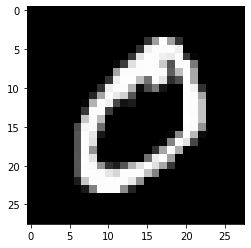

In [7]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(x_train_sub[0])
plt.show()

In [8]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(13, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(1, activation=tf.nn.sigmoid))

In [9]:
model

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 13)        130       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 13)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2197)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2197)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2198      
Total params: 2,328
Trainable params: 2,328
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.layers[3].get_weights()

[]

In [50]:
model.get_weights()

[array([[[[ 0.29547507, -0.03793899,  0.21449059, -0.02227019,
           -0.33222157,  0.3876881 ,  0.04995344,  0.08823525,
            0.04563212,  0.30939862,  0.1682686 ,  0.14583394,
           -0.21367808]],
 
         [[ 0.30684936,  0.04267297,  0.17671663,  0.3396878 ,
           -0.293504  , -0.37963453, -0.02186725,  0.06750137,
           -0.10637009,  0.1046124 ,  0.38052422,  0.1965303 ,
            0.15166456]],
 
         [[-0.15268968,  0.25544745,  0.15459694,  0.19774199,
           -0.19962211, -0.5423744 , -0.21673314,  0.3034085 ,
            0.3346938 ,  0.01465779, -0.06639957, -0.12778385,
            0.28827164]]],
 
 
        [[[ 0.1308593 , -0.12237195,  0.23374473,  0.02235247,
           -0.11218897, -0.04928025, -0.45183748,  0.2413221 ,
            0.2916373 ,  0.18929727, -0.00189241,  0.14567128,
           -0.30744004]],
 
         [[-0.0515956 ,  0.03227449, -0.08604115,  0.2627085 ,
           -0.09490064, -0.32713264, -0.40968823,  0.22556129,
   

In [46]:
# run the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_sub,y=y_train_sub, epochs=10)

Epoch 1/10
396/396 [==============================] - 2s 4ms/step - loss: 0.1277 - accuracy: 0.9672
Epoch 2/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.9981
Epoch 3/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0033 - accuracy: 0.9989
Epoch 4/10
396/396 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 5/10
396/396 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 6/10
396/396 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 7/10
396/396 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 8/10
396/396 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 9/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 10/10
396/396 [==============================] - 1s 4ms/step - loss: 9.4781e-04 - accuracy: 0.

In [44]:
model.layers[0].get_weights()

[array([[[[-0.24239725, -0.18535593, -0.30338585,  0.26653937,
           -0.00090095,  0.13377447, -0.40447456, -0.1284313 ,
            0.01487069,  0.40620062,  0.39069024,  0.21515928,
           -0.05032874]],
 
         [[-0.29156578, -0.2211209 , -0.24995701, -0.1830898 ,
            0.35916808,  0.32988584, -0.1464074 , -0.06396119,
            0.17615487, -0.18516727,  0.27140877,  0.40711674,
           -0.28476223]],
 
         [[-0.14335245, -0.08078393, -0.29124567, -0.3278417 ,
            0.2172545 , -0.00471927, -0.3049349 , -0.29271346,
            0.27333924, -0.40664345,  0.21132228,  0.29683813,
           -0.30278954]]],
 
 
        [[[-0.27964434, -0.19398496, -0.13423856, -0.09529804,
            0.07223766,  0.22241455, -0.06305213, -0.00288964,
           -0.19421245,  0.083341  ,  0.39383152,  0.05534967,
           -0.34467122]],
 
         [[-0.3248419 , -0.13749045, -0.37709838, -0.15248263,
            0.08706544,  0.28303885, -0.15761197, -0.16006711,
   

In [39]:
model.get_weights()

[array([[[[-0.24239725, -0.18535593, -0.30338585,  0.26653937,
           -0.00090095,  0.13377447, -0.40447456, -0.1284313 ,
            0.01487069,  0.40620062,  0.39069024,  0.21515928,
           -0.05032874]],
 
         [[-0.29156578, -0.2211209 , -0.24995701, -0.1830898 ,
            0.35916808,  0.32988584, -0.1464074 , -0.06396119,
            0.17615487, -0.18516727,  0.27140877,  0.40711674,
           -0.28476223]],
 
         [[-0.14335245, -0.08078393, -0.29124567, -0.3278417 ,
            0.2172545 , -0.00471927, -0.3049349 , -0.29271346,
            0.27333924, -0.40664345,  0.21132228,  0.29683813,
           -0.30278954]]],
 
 
        [[[-0.27964434, -0.19398496, -0.13423856, -0.09529804,
            0.07223766,  0.22241455, -0.06305213, -0.00288964,
           -0.19421245,  0.083341  ,  0.39383152,  0.05534967,
           -0.34467122]],
 
         [[-0.3248419 , -0.13749045, -0.37709838, -0.15248263,
            0.08706544,  0.28303885, -0.15761197, -0.16006711,
   

In [53]:
model.layers[0].get_weights()

[array([[[[-0.10387897, -0.13963866, -0.15653174,  0.01839969,
            0.01014172, -0.17537948, -0.15781988, -0.18897726,
            0.07095338, -0.09149274, -0.02019742,  0.20146014,
           -0.1767905 ]],
 
         [[ 0.21624626, -0.17676023,  0.21711092, -0.06476367,
            0.06040759,  0.09896444, -0.05444537,  0.05987091,
           -0.07484987,  0.13026051,  0.05561249, -0.03861058,
            0.04306172]],
 
         [[-0.11214229, -0.00214483,  0.0924191 , -0.1848209 ,
           -0.09868821,  0.18450974, -0.03816631, -0.00540927,
           -0.02095151, -0.00753208,  0.1062157 ,  0.13230534,
           -0.02812268]]],
 
 
        [[[-0.21193394,  0.03337015, -0.06724833, -0.0522825 ,
           -0.05943078,  0.21777119, -0.20010723,  0.11642553,
            0.06787769, -0.1169533 , -0.0981438 , -0.1533753 ,
           -0.16884387]],
 
         [[-0.05496794, -0.11883533, -0.01243648, -0.20971905,
            0.14812566,  0.09455724,  0.01152252, -0.15388387,
   

In [11]:
model.evaluate(x_test_sub, y_test_sub)

67/67 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9995


[0.0020562608260661364, 0.9995272159576416]